# Numpy

## Librerías

Las librerias son funciones que no vienen nativas en Python, pero pueden ser importadas.

Cuando importamos una libreria, le podemos asignar un alias. Por ejemplo: por convención se usa `np` para `numpy`.
Eventualmente podríamos usar cualquier nombre, pero se suele seguir la convención para facilidad de lectura de códigos y colaboración.

**Librerias que vamos a estudiar**
- `os`: Comunicación con sistema operativo.
- `NumPy`: Numeric Python (manipulacion de arrays)
- `Pandas`: Panel Data (análisis de datos)
- `Scikit-Learn`: Machine Learning
- `Matplotlib`, `Seaborn`: Gráficos

**Complementarias**
- `plotly`, `holoviews`, `bokeh`, `altair`: gráficos interactivos.
- `pyjanitor`: limpieza de datos.
- `streamlit`, `dash`, `shiny` (en versión alpha): dashboards interactivos.
- `pingouin`: herramientas estadísticas.
- `prince`: Reducción de dimencionalidad.

### NumPy

* Documentación: <https://numpy.org/doc/stable/>

Para poder trabajar con una lista de la forma que se hace en algebra lineal, es necesario que usemos la libreria `numpy`, y transformemos nuestra lista en un vector, ya que hay otros entornos en que podemos mutiplicar un vector por un escalar sin problemas, en python las listas por defecto dejan de ser vectores:

In [2]:
poleras = [254, 203, 182, 50]
print(poleras)
meses   = ["Ene", "Feb", "Mar", "Abr"]
meses

[254, 203, 182, 50]


['Ene', 'Feb', 'Mar', 'Abr']

In [3]:
poleras*2

[254, 203, 182, 50, 254, 203, 182, 50]

La librería `numpy` implementa el *arreglo* y operaciones con conjuntos de datos.


In [4]:
import numpy as np

array_poleras = np.array(poleras)
array_poleras

array([254, 203, 182,  50])

Ahora podemos utilizar nuestro array de manera lineal

In [5]:
array_poleras * 2

array([508, 406, 364, 100])

Con esta librería logramos hacer la mayoria de los calculos que usualmente utilizaremos, que por defecto no hubiesemos podido, por ejemplo, este código dará error:

In [6]:
# Estas funciones no son nativas de python
log(5) + pi / sqrt(5) - exp(2)

NameError: name 'log' is not defined

Una forma de utilizar estas funciones es mediante sus respectivas implementaciones en NumPy.

In [ ]:
np.log(5)

np.float64(1.6094379124341003)

In [ ]:
np.pi

3.141592653589793

Dicho esto, podemos solucionar el error.

In [ ]:
np.log(5) + np.pi / np.sqrt(5) - np.exp(2)

np.float64(-4.374655240288405)

In [ ]:
np.sqrt(5) - np.exp(2)

np.float64(-5.152988121430861)

In [ ]:
np.pi

3.141592653589793

> **Nota**: Existe la posibilidad de seleccionar las funcionalidades que necesitamos de cierta librería. De esta forma, no es necesario mencionar la librería de procedencia.

In [ ]:
from numpy import log10 as myotrolog10 # a modo de recordatorio

myotrolog10(10000000)

np.float64(7.0)

Relación del logaritmo y las potencias

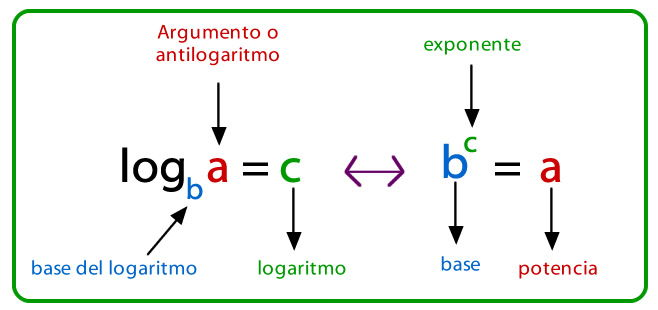

**Manipulación de arrays**

Las operaciones entre listas se coercionarán usando la misma jerarquía que hemos aprendido en las clases de Py.

In [ ]:
print(poleras)
print(meses)
print(np.array(poleras + meses))

[254, 203, 182, 50]
['Ene', 'Feb', 'Mar', 'Abr']
['254' '203' '182' '50' 'Ene' 'Feb' 'Mar' 'Abr']


Otra forma de seleccionar datos es usando operaciones lógicas, mediante las que podemos extraer solo los datos que cumplan ciertos requisitos. Por ejemplo: creamos una población normalmente distribuida de estaturas, con media $\mu=160$ cm y desviación estándar $\sigma=5$ cm.

In [ ]:
import numpy as np
np.random.seed(2)  # para reproducibilidad en NumPy
estaturas = np.random.normal(loc=160, scale=5, size=10000) #loc para la media, scale = desv. est y size = tamaño
estaturas

array([157.91621076, 159.71866586, 149.31901952, ..., 159.95038112,
       158.91068728, 170.02358089])

In [ ]:
cond1 = estaturas > 159
cond2 = estaturas < 161
print(cond1)
print(cond2)
print(estaturas[cond1 & cond2])  ##  159 < estaturas < 161 = esturas que pertenecen a ]159, 161[ = (159, 161)
print(estaturas[(estaturas > 159) & (estaturas < 161)]) # Otros operadores: distinto != , no ~, o |


[False  True False ...  True False  True]
[ True  True  True ...  True  True False]
[159.71866586 160.20769696 159.90434752 ... 160.63411393 160.90276902
 159.95038112]
[159.71866586 160.20769696 159.90434752 ... 160.63411393 160.90276902
 159.95038112]


**Estadística descriptiva**


| Sintaxis	| Descripcion |
|-----------|-------------|
min() |	Minimo
max()	| Maximo
ptp()	| Rango
quantile(a, q)	| Cuantil q
median(a)	| Mediana
mean()	| Promedio
std()	| Desviacion Standard
var()	| Varianza

* nota: *quantil(a,q)*, a = al vector y q = al tanto porciento (%)

In [ ]:
print(estaturas)
estaturas[5]

[157.91621076 159.71866586 149.31901952 ... 159.95038112 158.91068728
 170.02358089]


np.float64(155.79126317171898)

In [ ]:
mayores175 = estaturas[estaturas > 175]
mayores175

array([176.39872701, 180.54346312, 175.80482985, 175.95950623,
       175.04715594, 176.55340029, 177.45938466, 175.44925002,
       177.88484155, 180.66681155, 175.44881124, 176.34655187,
       176.19048744, 175.25429092, 177.32238628, 175.22853727,
       176.89751121, 176.05920542, 175.26294068])

In [ ]:
print("Promedio    :", np.mean(mayores175))
print("Varianza    :", np.var(mayores175)) # esto no dice nada, ya que no tiene interpretabilidad
print("Percentil 75:", np.quantile(mayores175, 0.75))

Promedio    : 176.61989960724816
Varianza    : 2.485895267962833
Percentil 75: 177.1099487442715


**Vectorización**

Las funciones sobre arrays son aplicadas elemento a elemento, por lo que no necesitamos listas por comprensión:

In [ ]:
def fahrenheit_a_celcius(temperatura):
  calculo = (temperatura - 32) / 1.8
  return calculo

In [ ]:
fahrenheit_a_celcius(80)

26.666666666666664

In [ ]:
fahrenheit_a_celcius([80,76,94])

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [ ]:
# Así sería sin Numpy
datos = [80, 76, 94]

lista_vacia = []
for i in datos:
    aux = fahrenheit_a_celcius(i)
    lista_vacia.append(aux)

print(lista_vacia)

[26.666666666666664, 24.444444444444443, 34.44444444444444]


In [ ]:
# Así sería con Numpy

datos2 = np.array([80, 76,94])
fahrenheit_a_celcius(datos2)

array([26.66666667, 24.44444444, 34.44444444])

In [ ]:
otra = np.array([76, 45, 90, 65])
fahrenheit_a_celcius(otra)

array([24.44444444,  7.22222222, 32.22222222, 18.33333333])

**Control de valores en arrays**

Si deseamos asignar valores de acuerdo al cumplimiento de condiciones para un vector, las funciones `np.where` y `np.select` son la solución, las cuales funcionan como:

```python
np.where(condicion, que hacer si es cierto, que hacer si es falso)
np.select(lista condiciones, lista elecciones, en otro caso)
```

In [ ]:
notas = np.array([2.5, 7, 5.2, 1.4, 6.8, 5.0 , 4.9, 5.8])
notas

array([2.5, 7. , 5.2, 1.4, 6.8, 5. , 4.9, 5.8])

In [ ]:
# np.where
estado_aprobacion = np.where(notas >= 4, "Aprobado", "Reprobado")
estado_aprobacion

array(['Reprobado', 'Aprobado', 'Aprobado', 'Reprobado', 'Aprobado',
       'Aprobado', 'Aprobado', 'Aprobado'], dtype='<U9')

In [ ]:
# np.select
estado_examen = np.select(
    # Condiciones
    condlist=[notas > 5.5, notas >= 4.0],
    # Elecciones
    choicelist=["Eximido", "A dar el examen"],
    # Else
    default="A salvar el ramo",
)

estado_examen

array(['A salvar el ramo', 'Eximido', 'A dar el examen',
       'A salvar el ramo', 'Eximido', 'A dar el examen',
       'A dar el examen', 'Eximido'], dtype='<U16')

## Matrices

**Manipulación de matrices**

Una matriz es simplemente un arreglo de arreglos y sus elementos se acceden usando 2 índices.

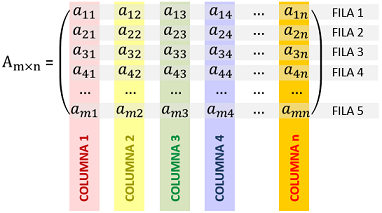

In [ ]:
#M_mxn: filas x columnas = fxc

import numpy as np
np.random.seed(1)
mat = np.random.randint(low=0, high=10, size=(3, 4))
print(mat)

[[5 8 9 5]
 [0 0 1 7]
 [6 9 2 4]]


In [ ]:
print("Una matriz:\n", mat)
print("")
print("Un elemento:", mat[1, 2]) # filas x columnas = FELIZ CUMPLEAÑOS!!!!!! FxC
print("")
print("Una fila:", mat[1 , :])
print("")
print("Una columna:", mat[:, 1])
print("")
print("Un subconjunto:\n", mat[0:2, 1:4]) #filas 0 y 1, además de columnas 1, 2 y 3

Una matriz:
 [[5 8 9 5]
 [0 0 1 7]
 [6 9 2 4]]

Un elemento: 1

Una fila: [0 0 1 7]

Una columna: [8 0 9]

Un subconjunto:
 [[8 9 5]
 [0 1 7]]


In [ ]:
# Nemotecnia fxc = filas x columnas = feliz x cumpleaños

# Crear una matriz de 2x3 con números enteros --> Cree una matriz de 2 filas y 3 columnas

matriz = np.array([[1, 2, 3], [4, 5, 6]])
print(matriz)


[[1 2 3]
 [4 5 6]]


In [ ]:
matriz_cuadrada3x3 = np.array([[1, 2, 3], [4, 5, 6], [7,8,9]])
print(matriz_cuadrada3x3)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
# Transponer la matriz = invertir posiciones
matriz_transpuesta = matriz.T
print(matriz_transpuesta)

In [ ]:
# Matriz de números aleatorios de 2x3
matriz_aleatoria = np.random.rand(2, 3)
print(np.round(matriz_aleatoria,2)) #Recuerde que desde ahora debe usar las funciones de libreria

In [ ]:
# Matriz de ceros de 3x3
matriz_ceros = np.zeros((3, 3))
print(matriz_ceros)
print(" ")

# Matriz de unos de 2x4
matriz_unos = np.ones((2, 4))
print(matriz_unos)
print(" ")

# Matriz de identidad de 3x3
matriz_identidad = np.eye(3)
print(matriz_identidad)

In [ ]:
matriz

In [ ]:
# Acceder al elemento en la fila 1, columna 2
elemento = matriz[1, 2] # posición fila , columna
print(elemento)
print(" ")

# Acceder a la primera fila
primera_fila = matriz[0, :]
print(primera_fila)
print(" ")

# Acceder a la segunda columna
segunda_columna = matriz[:, 1]
print(segunda_columna)


In [ ]:
# Sumar una constante a todos los elementos de la matriz
suma_constante = matriz + 10
print(suma_constante)
print(" ")

# Multiplicar todos los elementos de la matriz por 2
multiplicacion_constante = matriz * 2
print(multiplicacion_constante)
print(" ")

# Sumar dos matrices & Recuerde: Deben ser de la misma dimensión
matriz_2 = np.array([[7, 8, 9], [10, 11, 12]])
suma_matrices = matriz + matriz_2
print(suma_matrices)


In [ ]:
# Calcular la raíz cuadrada de cada elemento
raiz_cuadrada = np.sqrt(matriz)
print(raiz_cuadrada)
print(" ")

# Calcular el seno de cada elemento
seno = np.sin(matriz)
print(seno)
print(" ")

# Calcular la suma de todos los elementos de la matriz
suma_total = np.sum(matriz)
print(suma_total)


In [ ]:
# Crear una matriz de 3x3 con valores booleanos
matriz_booleana = np.array([[True, False, True], [False, True, False], [True, True, False]])
print("Matriz Booleana Original:")
print(matriz_booleana)
print(" ")

# Operación lógica: negación (NOT) de la matriz
matriz_negada = ~matriz_booleana
print("\nMatriz Booleana Negada (NOT):")
print(matriz_negada)
print(" ")

# Filtrado de una matriz utilizando una matriz booleana
matriz_original = np.array([[10, 20, 30], [40, 50, 60], [70, 80, 90]])
matriz_filtrada = matriz_original[matriz_booleana]
print("\nMatriz Original:")
print(matriz_original)
print("\nMatriz Filtrada con la Matriz Booleana:")
print(matriz_filtrada)

# Pandas

## Pandas

En la clase inicial realizamos una introducción general a python, donde aprendimos distintos tipos de objetos, creación de variables, funciones, operaciones, etc. En esta clase aprenderemos a utilizar el modulo Pandas, el cual consiste en una librería open-source que permite realizar manipulación y análisis de datos estructurados (tablas, dataframe).

Dentro de los conceptos que revisaremos durante este modulo serán:
 - Creación e importación de dataframes
 - Índices
 - Selección de variables y/o observaciones
 - Vista y operación de dataframes
 - Principales métodos de un dataframe
 - Métodos de agregación y merge

## Creación e importación de dataframes

Un dataframe o tabla se puede considerar la unidad base para realizar data science, dado que consiste en forma ordenada de presentar las observaciones correspondientes a distintas variables de interés. En este sentido, partiremos desde lo más esencial que es crear un dataframe desde cero para luego importar dataframes (que es típicamente lo que más hacemos!)

Primero que todo, importamos el módulo que nos permite hacer todo lo que hemos hablado hasta hora que es `pandas`!

In [ ]:
import pandas as pd

Para ver la descripción del módulo podemos utilizar el comando help(pd) y se desplegará un informativo del módulo. Para la documentación y otras consultas sobre el módulo, pueden visitar https://pandas.pydata.org

#### Creación

Ahora que tenemos importado nuestro módulo, podemos crear nuestro primer dataframe. Para ello utilizaremos los siguientes datos

| Nombre | Edad | Color de pelo | Hobby | Sexo |
| --- | --- | --- | --- | --- |
| Camila | 25 | Castaño | Deporte | F |
| Ernesto | 44 | Negro | Bailar | M |
| Bastian | 34 | Rubio | Bateria | M |
| Paz | 31 | Pelirrojo | Karate |

los cuales debemos guardar como un data frame utilizando pandas, lo que se realiza de la siguiente forma:

In [ ]:
import pandas as pd
import numpy as np # para indicar el dato faltante

In [ ]:
first_dataset = pd.DataFrame(
    {
        'Nombre'       : ["Juan", "David","Ernesto","Kate"],
        'Edad'         : [25,44,34,31],
        'Color de pelo': ['Castaño','Negro','Rubio','Pelirrojo'],
        'Hobby'        : ['Deporte','Bailar','Bateria','Karate'],
        'Sexo'         : ['F', 'M', 'M', np.nan]
    }
)

In [ ]:
first_dataset

,Nombre,Edad,Color de pelo,Hobby,Sexo
0,Juan,25,Castaño,Deporte,F
1,David,44,Negro,Bailar,M
2,Ernesto,34,Rubio,Bateria,M
3,Kate,31,Pelirrojo,Karate,NaN


In [ ]:
categ = first_dataset.select_dtypes('object')
categ

,Nombre,Color de pelo,Hobby,Sexo
0,Juan,Castaño,Deporte,F
1,David,Negro,Bailar,M
2,Ernesto,Rubio,Bateria,M
3,Kate,Pelirrojo,Karate,NaN


In [ ]:
first_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nombre         4 non-null      object
 1   Edad           4 non-null      int64 
 2   Color de pelo  4 non-null      object
 3   Hobby          4 non-null      object
 4   Sexo           3 non-null      object
dtypes: int64(1), object(4)
memory usage: 292.0+ bytes


In [ ]:
criterio = categ.nunique() > 3
criterio

,0
Nombre,True
Color de pelo,True
Hobby,True
Sexo,False


In [ ]:
variables = categ.columns[criterio]
variables #para renombrar o filtrar otra base de datos

Index(['Nombre', 'Color de pelo', 'Hobby'], dtype='object')

In [ ]:
first_dataset

Observamos que la tabla creada es identica a la inicial con la diferencia que esta última posee una columna adicional con lo números del 0 al 3 la cual se denomina índice. Profundizaremos en ellos un poco más adelante.

#### Importación

En la gran mayoría (si es que no en todos) los proyectos de data science, los datos a utilizar provienen de una fuente externa (archivo, base de datos, etc) y en un gran volumen! por lo cual reconstruir dichos datos como los acabamos de imputar se vuelve imposible. Por esto, utilizaremos el módulo de pandas que trae funciones que nos permiten transformar archivos de datos en dataframes. En particular, veremos como traer datos desde un archivo, como CSV u otros formatos.

Cuando nuestros datos vienen en un archivo CSV, utilizamos la función **read_csv** para poder desde un archivo crear un dataframe

In [ ]:
import os

print("Directorio actual:", os.getcwd())


Directorio actual: /content


In [ ]:
# (Opcional) Si estás en Google Colab, puedes montar Drive para leer archivos desde tu nube.
try:
    from google.colab import drive
    drive.mount('/content/drive')
except Exception:
    print("No estás en Google Colab (o no aplica). Seguimos sin montar Drive.")


In [ ]:
# Ruta esperada del archivo (ajústala según tu caso)
ruta_notas = "notas-alumnos.csv"  # por ejemplo: "data/notas-alumnoscsv"
df_notas = pd.read_csv(ruta_notas)

In [ ]:
df_notas

,colegio,sexo,edad,ausencias,N1,N2,N3
0,GP,F,18,6,1.8,2.1,2.1
1,GP,F,17,4,1.8,1.8,2.1
2,GP,F,15,10,2.4,2.8,3.5
3,GP,F,15,2,5.2,4.9,5.2
4,GP,F,16,4,2.1,3.5,3.5
...,...,...,...,...,...,...,...
390,MS,M,20,11,3.2,3.2,3.2
391,MS,M,17,3,4.9,5.6,5.6
392,MS,M,21,3,3.5,2.8,2.4
393,MS,M,18,0,3.9,4.2,3.5


---
# Caso Análisis Notas Alumnos

En el siguiente caso, se realizará un análisis exploratorio de un set de datos correspondiente a las notas de alumnos de 8vo básico en dos colegios. Siga el análisis paso a paso.

---

#### 1. Importe la librería pandas

In [ ]:
import pandas as pd

#### 2. Realice la lectura  del archivo notas-alumnos.csv

In [ ]:
import os
import pandas as pd

csv_file = 'notas-alumnos.csv'
df = pd.read_csv(csv_file)
df


,colegio,sexo,edad,ausencias,N1,N2,N3
0,GP,F,18,6,1.8,2.1,2.1
1,GP,F,17,4,1.8,1.8,2.1
2,GP,F,15,10,2.4,2.8,3.5
3,GP,F,15,2,5.2,4.9,5.2
4,GP,F,16,4,2.1,3.5,3.5
...,...,...,...,...,...,...,...
390,MS,M,20,11,3.2,3.2,3.2
391,MS,M,17,3,4.9,5.6,5.6
392,MS,M,21,3,3.5,2.8,2.4
393,MS,M,18,0,3.9,4.2,3.5


#### 3. Despliegue las primeras 5 filas de la tabla

In [ ]:
df.head()

,colegio,sexo,edad,ausencias,N1,N2,N3
0,GP,F,18,6,1.8,2.1,2.1
1,GP,F,17,4,1.8,1.8,2.1
2,GP,F,15,10,2.4,2.8,3.5
3,GP,F,15,2,5.2,4.9,5.2
4,GP,F,16,4,2.1,3.5,3.5


In [ ]:
df.head(10)

,colegio,sexo,edad,ausencias,N1,N2,N3
0,GP,F,18,6,1.8,2.1,2.1
1,GP,F,17,4,1.8,1.8,2.1
2,GP,F,15,10,2.4,2.8,3.5
3,GP,F,15,2,5.2,4.9,5.2
4,GP,F,16,4,2.1,3.5,3.5
5,GP,M,16,10,5.2,5.2,5.2
6,GP,M,16,0,4.2,4.2,3.9
7,GP,F,17,6,2.1,1.8,2.1
8,GP,M,15,0,5.6,6.3,6.6
9,GP,M,15,0,4.9,5.2,5.2


In [ ]:
# Información básica del dataset
print('Filas, columnas:', df.shape)
print('Columnas:', list(df.columns))
df.dtypes


Filas, columnas: (395, 7)
Columnas: ['colegio', 'sexo', 'edad', 'ausencias', 'N1', 'N2', 'N3']


,0
colegio,object
sexo,object
edad,int64
ausencias,int64
N1,float64
N2,float64
N3,float64


#### 4. ¿Cuál es la edad mínima y máxima que se encuentran en los datos?

In [ ]:
edad_min = df['edad'].min()
edad_max = df['edad'].max()


In [ ]:
print('Edad mínima:', edad_min)
print('Edad máxima:', edad_max)


Edad mínima: 15
Edad máxima: 22


In [ ]:
df[['edad', 'sexo']].head()

,edad,sexo
0,18,F
1,17,F
2,15,F
3,15,F
4,16,F


In [ ]:
df['edad'].describe()

,edad
count,395.000000
mean,16.696203
std,1.276043
min,15.000000
25%,16.000000
50%,17.000000
75%,18.000000
max,22.000000


In [ ]:
df['edad'].describe()[['min','max','mean','50%']]


,edad
min,15.000000
max,22.000000
mean,16.696203
50%,17.000000


#### 5. Calcule el promedio de la prueba N1

In [ ]:
promedio_n1 = df['N1'].mean()
promedio_n1


np.float64(3.8248101265822783)

In [ ]:
print(f'Promedio N1: {promedio_n1:.2f}')


Promedio N1: 3.82


#### 6. Calcule la desviación estándar de la prueba N1

In [ ]:
desv_n1 = df['N1'].std()
desv_n1


1.164139363985446

In [ ]:
print(f'Desviación estándar N1: {desv_n1:.2f}')


Desviación estándar N1: 1.16


#### 7. Calcule la mediana de la pueba N1

In [ ]:
mediana_n1 = df['N1'].median()
mediana_n1


3.9

In [ ]:
print(f'Mediana N1: {mediana_n1:.2f}')


Mediana N1: 3.90


#### 8. Calcule la nota N1 correspondiente al decil más bajo

In [ ]:
decil_bajo_n1 = df['N1'].quantile(0.10)
decil_bajo_n1


np.float64(2.4)

In [ ]:
print(f'Decil más bajo (P10) de N1: {decil_bajo_n1:.2f}')


Decil más bajo (P10) de N1: 2.40


#### 9. Calcule la nota N1 correspondiente al decil más alto

In [ ]:
decil_alto_n1 = df['N1'].quantile(0.90)
decil_alto_n1


np.float64(5.6)

In [ ]:
print(f'Decil más alto (P90) de N1: {decil_alto_n1:.2f}')


Decil más alto (P90) de N1: 5.60


#### 10. Construya un histograma con la nota N1

Puede utilizar:

    kind='hist'

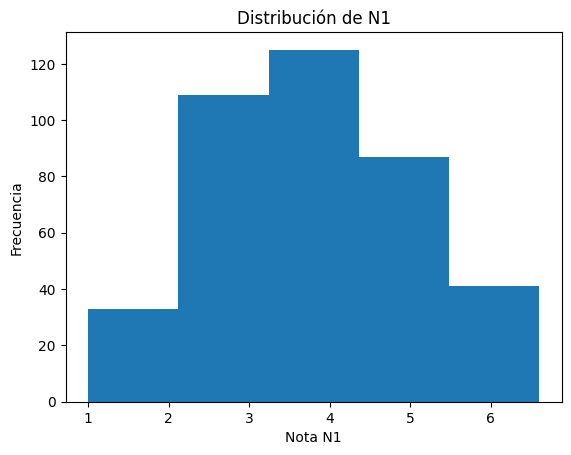

In [ ]:
import matplotlib.pyplot as plt

ax = df['N1'].plot(kind='hist', bins=5)
ax.set_title('Distribución de N1')
ax.set_xlabel('Nota N1')
ax.set_ylabel('Frecuencia')
plt.show()


In [ ]:
# Interpretación rápida (a partir del histograma):
# La forma de la distribución permite identificar concentración de notas y posibles asimetrías.
# Ajusta bins si necesitas mayor/menor granularidad.


#### 11. Filtre el dataframe seleccionando los registros de alumnos mayores de 18 años

In [ ]:
df_mayores = df[df['edad'] > 18]
df_mayores.head()


,colegio,sexo,edad,ausencias,N1,N2,N3
127,GP,F,19,2,2.4,2.8,3.2
153,GP,M,19,0,1.8,0.0,0.0
210,GP,F,19,10,2.8,2.8,2.8
247,GP,M,22,16,2.1,2.8,2.8
257,GP,M,19,12,3.9,3.9,3.9


In [ ]:
print('Cantidad de alumnos > 18 años:', df_mayores.shape[0])


Cantidad de alumnos > 18 años: 29


#### 12. Calcule el promedio de notas de los alumnos mayores de edad

In [ ]:
df_mayores_de_edad = df[df['edad'] >= 18]
df_mayores_de_edad.shape

(111, 7)

In [ ]:
prom_mayores = df_mayores_de_edad[['N1','N2','N3']].mean()
prom_mayores


,0
N1,3.732432
N2,3.514414
N3,3.281982


In [ ]:
print('Promedio por prueba (mayores de edad):')
print(prom_mayores.round(2))
print('Promedio general (mayores de edad):', round(prom_mayores.mean(), 2))


Promedio por prueba (mayores de edad):
N1    3.73
N2    3.51
N3    3.28
dtype: float64
Promedio general (mayores de edad): 3.51


#### 13. Calcule el promedio de notas de los alumnos menores de edad. ¿Quiénes obtienen mejor calificación?

In [ ]:
df_menores = df[df['edad'] < 18]
prom_menores = df_menores[['N1','N2','N3']].mean()

print('Promedio general (mayores de edad):', round(prom_mayores.mean(), 2))
print('Promedio general (menores de edad):', round(prom_menores.mean(), 2))


Promedio general (mayores de edad): 3.51
Promedio general (menores de edad): 3.84


In [ ]:
if prom_mayores.mean() > prom_menores.mean():
    print('En promedio, los mayores de edad obtienen mejor calificación.')
elif prom_mayores.mean() < prom_menores.mean():
    print('En promedio, los menores de edad obtienen mejor calificación.')
else:
    print('En promedio, ambos grupos obtienen la misma calificación.')


En promedio, los menores de edad obtienen mejor calificación.


#### 14. Agrupe los datos para determinar quiénes obtienen mejor nota  ¿Los hombres o las mujeres?

In [ ]:
df.groupby('sexo')

In [ ]:
prom_por_sexo = df.groupby('sexo')[['N1','N2','N3']].mean()
prom_por_sexo


,N1,N2,N3
sexo,,,
F,3.722115,3.647596,3.499519
M,3.939037,3.886096,3.826738


In [ ]:
print('Promedio general por sexo (promedio de N1,N2,N3):')
print(prom_por_sexo.mean(axis=1).round(2).sort_values(ascending=False))


Promedio general por sexo (promedio de N1,N2,N3):
sexo
M    3.88
F    3.62
dtype: float64


#### 15. ¿Qué colegio tiene mejores notas?

In [ ]:
prom_por_colegio = df.groupby('colegio')[['N1','N2','N3']].mean()
prom_por_colegio


,N1,N2,N3
colegio,,,
GP,3.836103,3.783381,3.680516
MS,3.739130,3.586957,3.456522


In [ ]:
print('Promedio general por colegio (promedio de N1,N2,N3):')
print(prom_por_colegio.mean(axis=1).round(2).sort_values(ascending=False))


Promedio general por colegio (promedio de N1,N2,N3):
colegio
GP    3.77
MS    3.59
dtype: float64


#### 16. Desafío: Agregue una columna que se llame NF y que corresponda al promedio de las 3 notas

In [ ]:
df['NF'] = df[['N1','N2','N3']].mean(axis=1)
df.head()


,colegio,sexo,edad,ausencias,N1,N2,N3,NF
0,GP,F,18,6,1.8,2.1,2.1,2.000000
1,GP,F,17,4,1.8,1.8,2.1,1.900000
2,GP,F,15,10,2.4,2.8,3.5,2.900000
3,GP,F,15,2,5.2,4.9,5.2,5.100000
4,GP,F,16,4,2.1,3.5,3.5,3.033333


In [ ]:
print('NF (promedio final) - resumen:')
print(df['NF'].describe().round(2))

print('\nPromedio NF por sexo:')
print(df.groupby('sexo')['NF'].mean().round(2).sort_values(ascending=False))

print('\nPromedio NF por colegio:')
print(df.groupby('colegio')['NF'].mean().round(2).sort_values(ascending=False))


NF (promedio final) - resumen:
count    395.00
mean       3.75
std        1.29
min        0.47
25%        2.93
50%        3.77
75%        4.70
max        6.73
Name: NF, dtype: float64

Promedio NF por sexo:
sexo
M    3.88
F    3.62
Name: NF, dtype: float64

Promedio NF por colegio:
colegio
GP    3.77
MS    3.59
Name: NF, dtype: float64


---